# Project 1
## The Net Wars: Attack of the Bots
### Advanced Machine Learning - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# Just to make plots look better
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

|Class  |Label |
| ----- | ---- | 
|Normal	|0     |
|Dos	|1     |
|R2L	|2     |
|U2R	|3     |
|Probe	|4     |

In [374]:
PATH_TO_DATA = 'dataset/'

test_students = pd.read_csv(PATH_TO_DATA + 'test_students.csv')
SampleID = test_students['SampleID']

train_students = pd.read_csv(PATH_TO_DATA + 'train_students.csv')


In [375]:
test_students = test_students.drop('SampleID', axis=1)

### Check Nulls and DataType

In [376]:
print(test_students.info())
print(train_students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44556 entries, 0 to 44555
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     44556 non-null  int64  
 1   protocol_type                44556 non-null  object 
 2   service                      44556 non-null  object 
 3   flag                         44556 non-null  object 
 4   src_bytes                    44556 non-null  int64  
 5   dst_bytes                    44556 non-null  int64  
 6   land                         44556 non-null  int64  
 7   wrong_fragment               44556 non-null  int64  
 8   urgent                       44556 non-null  int64  
 9   hot                          44556 non-null  int64  
 10  num_failed_logins            44556 non-null  int64  
 11  logged_in                    44556 non-null  int64  
 12  num_compromised              44556 non-null  int64  
 13  root_shell      

### Correct possible outliers

num_ts = train_students.select_dtypes(include=np.number)
df1 = num_ts.loc[:, num_ts.isin([0,1]).all()] # binary features
num_ts = num_ts.drop(df1.columns, axis=1)
display(num_ts)
num_ts.describe()

In [377]:
#Service não contêm o mesmo núemero de valores
train_students = train_students.drop('service', axis=1)
test_students = test_students.drop('service', axis=1)

#Valores com 75% de 0 sendo que a média é baixa ou perto de 0

train_students = train_students.drop('hot', axis=1)
test_students = test_students.drop('hot', axis=1)

train_students = train_students.drop('num_compromised', axis=1)
test_students = test_students.drop('num_compromised', axis=1)

train_students = train_students.drop('num_root', axis=1)
test_students = test_students.drop('num_root', axis=1)

train_students = train_students.drop('num_file_creations', axis=1)
test_students = test_students.drop('num_file_creations', axis=1)

In [382]:
num_ts = train_students.select_dtypes(include=np.number)
df1 = num_ts.loc[:, num_ts.isin([0,1]).all()] # binary features
num_ts = num_ts.drop(df1.columns, axis=1)
display(num_ts)
num_ts.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,num_failed_logins,su_attempted,num_shells,num_access_files,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000018,1.883383e-06,2.236748e-07,0.0,0.0,0,0,0,0,2,...,255,74,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0
1,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,113,...,255,18,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0
2,0.000000,2.029039e-07,1.011804e-05,0.0,0.0,0,0,0,0,12,...,12,254,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0
3,0.000000,1.666710e-07,1.207691e-06,0.0,0.0,0,0,0,0,18,...,21,255,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0
4,0.000000,1.579751e-07,3.687199e-07,0.0,0.0,0,0,0,0,15,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,258,...,255,4,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0
103957,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,24,...,255,4,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0
103958,0.000000,0.000000e+00,6.336181e-08,0.0,0.0,0,0,0,0,1,...,255,124,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0
103959,0.000918,1.637724e-07,1.996279e-06,0.0,0.0,0,0,1,1,1,...,255,2,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,num_failed_logins,su_attempted,num_shells,num_access_files,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,103961.000000,1.039610e+05,1.039610e+05,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,...,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000
mean,0.005054,2.879182e-05,1.760874e-05,0.006820,0.000058,0.004232,0.000933,0.000500,0.004030,83.486182,...,183.771857,119.597243,0.535200,0.084182,0.146056,0.030645,0.255452,0.250485,0.137248,0.137525
std,0.044951,4.186093e-03,3.379015e-03,0.079889,0.005848,0.071813,0.041484,0.024416,0.096461,116.854244,...,98.605667,111.244045,0.448242,0.194313,0.308700,0.108958,0.428060,0.429276,0.323793,0.336550
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,86.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.188489e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.021792e-07,4.427692e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.010000,0.550000,0.490000,0.000000,0.000000
max,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,4.000000,2.000000,2.000000,9.000000,511.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


num_ts = train_students.select_dtypes(include=np.number)
df1 = num_ts.loc[:, num_ts.isin([0,1]).all()] # binary features
num_ts = num_ts.drop(df1.columns, axis=1)
display(num_ts)
#train_students[num_ts.columns[14]].hist()

As features não são seguem uma distribuição normal. Deste modo, o melhor método para detetar outliers é o IQR

k = 1.5 #limiar habitual

for c in num_ts.columns:
    k = 1.5
    quantil = train_students[c].quantile([0.25,0.75])
    iqr = quantil[0.75] - quantil[0.25]
    limite = [quantil[0.25] - k*iqr, quantil[0.75] + k*iqr]

    train_students.loc[(train_students[c] < limite[0]) | (train_students[c] > limite[1]), c] = train_students[c].mean()

In [378]:

# TO SEE IF WE CONTINUE TO HAVE OUTLIERS
'''
for c in num_ts.columns:
    asc = train_students[c].sort_values()   #coluna por ordem ascendente
    qs = asc.quantile([0.25, 0.75])
    iqr = qs[0.75] - qs[0.25]

    print(len(train_students.loc[train_students[c] < (qs[0.25] - (k * iqr)), c]))
    print(len(train_students.loc[train_students[c] > (qs[0.75] + (k * iqr)), c]))
'''
train_students.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,103961.000000,1.039610e+05,1.039610e+05,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,...,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000
mean,275.173796,3.973167e+04,2.306635e+04,0.000164,0.020460,0.000173,0.004232,0.402593,0.001491,0.000933,...,183.771857,119.597243,0.535200,0.084182,0.146056,0.030645,0.255452,0.250485,0.137248,0.137525
std,2447.626055,5.776657e+06,4.426298e+06,0.012787,0.239667,0.017544,0.071813,0.490423,0.038584,0.041484,...,98.605667,111.244045,0.448242,0.194313,0.308700,0.108958,0.428060,0.429276,0.323793,0.336550
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,86.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.800000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.010000,0.550000,0.490000,0.000000,0.000000
max,54451.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'''
OTHER METHOD FOR NORMAL DISTRIBUTED

for c in num_ts.columns:
    print(len(train_students[train_students[c] < (train_students[c].mean() - (3*train_students[c].std()))]))
    print(len(train_students[train_students[c] > (train_students[c].mean() + (3*train_students[c].std()))]))
'''

### Normalization

In [383]:
display(train_students)

for c in num_ts.columns:
    minV = train_students[c].min()
    maxV = train_students[c].max()
    train_students[c] = (train_students[c] - minV) / (maxV - minV)

display(train_students)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0.000018,tcp,SF,1.883383e-06,2.236748e-07,0,0.0,0.0,0,1,...,74,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0,Dos
1,0.000000,tcp,S0,0.000000e+00,0.000000e+00,0,0.0,0.0,0,0,...,18,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0,Dos
2,0.000000,tcp,SF,2.029039e-07,1.011804e-05,0,0.0,0.0,0,1,...,254,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0,normal
3,0.000000,tcp,SF,1.666710e-07,1.207691e-06,0,0.0,0.0,0,1,...,255,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0,normal
4,0.000000,tcp,SF,1.579751e-07,3.687199e-07,0,0.0,0.0,0,1,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0.000000,tcp,RSTO,0.000000e+00,0.000000e+00,0,0.0,0.0,0,0,...,4,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0,Dos
103957,0.000000,tcp,S0,0.000000e+00,0.000000e+00,0,0.0,0.0,0,0,...,4,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0,Dos
103958,0.000000,tcp,SF,0.000000e+00,6.336181e-08,0,0.0,0.0,0,1,...,124,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0,normal
103959,0.000918,tcp,SF,1.637724e-07,1.996279e-06,0,0.0,0.0,0,1,...,2,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0,R2L


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0.000018,tcp,SF,1.883383e-06,2.236748e-07,0,0.0,0.0,0.0,1,...,0.290196,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0,Dos
1,0.000000,tcp,S0,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0,...,0.070588,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0,Dos
2,0.000000,tcp,SF,2.029039e-07,1.011804e-05,0,0.0,0.0,0.0,1,...,0.996078,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0,normal
3,0.000000,tcp,SF,1.666710e-07,1.207691e-06,0,0.0,0.0,0.0,1,...,1.000000,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0,normal
4,0.000000,tcp,SF,1.579751e-07,3.687199e-07,0,0.0,0.0,0.0,1,...,1.000000,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0.000000,tcp,RSTO,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0,...,0.015686,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0,Dos
103957,0.000000,tcp,S0,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0,...,0.015686,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0,Dos
103958,0.000000,tcp,SF,0.000000e+00,6.336181e-08,0,0.0,0.0,0.0,1,...,0.486275,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0,normal
103959,0.000918,tcp,SF,1.637724e-07,1.996279e-06,0,0.0,0.0,0.0,1,...,0.007843,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0,R2L


In [384]:
display(test_students)

for c in num_ts.columns:
    minV = test_students[c].min()
    maxV = test_students[c].max()
    test_students[c] = (test_students[c] - minV) / (maxV - minV)

display(test_students)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,udp,SF,44,115,0,0,0,0,0,...,255,248,0.97,0.01,0.00,0.00,0.00,0.0,0.0,0.0
1,0,tcp,SF,248,1273,0,0,0,0,1,...,29,255,1.00,0.00,0.03,0.03,0.00,0.0,0.0,0.0
2,0,tcp,SF,310,1957,0,0,0,0,1,...,11,241,1.00,0.00,0.09,0.08,0.00,0.0,0.0,0.0
3,0,tcp,SF,240,4664,0,0,0,0,1,...,18,255,1.00,0.00,0.06,0.01,0.00,0.0,0.0,0.0
4,0,tcp,S0,0,0,0,0,0,0,0,...,255,64,0.25,0.02,0.01,0.00,1.00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44551,0,tcp,SF,661,329,0,0,0,0,1,...,163,69,0.36,0.02,0.01,0.03,0.00,0.0,0.0,0.0
44552,0,tcp,S0,0,0,0,0,0,0,0,...,255,19,0.07,0.06,0.00,0.00,1.00,1.0,0.0,0.0
44553,0,tcp,S0,0,0,0,0,0,0,0,...,174,9,0.05,0.07,0.01,0.00,0.99,1.0,0.0,0.0
44554,0,tcp,SF,325,7309,0,0,0,0,1,...,4,255,1.00,0.00,0.25,0.03,0.00,0.0,0.0,0.0


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,udp,SF,6.345767e-08,0.000016,0,0.0,0.0,0.0,0,...,1.000000,0.972549,0.97,0.01,0.00,0.00,0.00,0.0,0.0,0.0
1,0.000000,tcp,SF,3.576705e-07,0.000181,0,0.0,0.0,0.0,1,...,0.113725,1.000000,1.00,0.00,0.03,0.03,0.00,0.0,0.0,0.0
2,0.000000,tcp,SF,4.470881e-07,0.000278,0,0.0,0.0,0.0,1,...,0.043137,0.945098,1.00,0.00,0.09,0.08,0.00,0.0,0.0,0.0
3,0.000000,tcp,SF,3.461327e-07,0.000664,0,0.0,0.0,0.0,1,...,0.070588,1.000000,1.00,0.00,0.06,0.01,0.00,0.0,0.0,0.0
4,0.000000,tcp,S0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0,...,1.000000,0.250980,0.25,0.02,0.01,0.00,1.00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44551,0.000000,tcp,SF,9.533072e-07,0.000047,0,0.0,0.0,0.0,1,...,0.639216,0.270588,0.36,0.02,0.01,0.03,0.00,0.0,0.0,0.0
44552,0.000000,tcp,S0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0,...,1.000000,0.074510,0.07,0.06,0.00,0.00,1.00,1.0,0.0,0.0
44553,0.000000,tcp,S0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0,...,0.682353,0.035294,0.05,0.07,0.01,0.00,0.99,1.0,0.0,0.0
44554,0.000000,tcp,SF,4.687214e-07,0.001040,0,0.0,0.0,0.0,1,...,0.015686,1.000000,1.00,0.00,0.25,0.03,0.00,0.0,0.0,0.0


Categoric features
O service do train_students tem mais um tipo que no test_students. 

In [385]:
train_students = pd.get_dummies(train_students, columns=['protocol_type'], drop_first=True)
#train_students = train_students.drop('service', axis=1)
#train_students = pd.get_dummies(train_students, columns=['service'], drop_first=True)
train_students= pd.get_dummies(train_students, columns=['flag'], drop_first=True)

test_students = pd.get_dummies(test_students, columns=['protocol_type'], drop_first=True)
#test_students = test_students.drop('service', axis=1)
#test_students = pd.get_dummies(test_students, columns=['service'], drop_first=True)
test_students= pd.get_dummies(test_students, columns=['flag'], drop_first=True)



In [386]:
train_students.replace('normal', 0, inplace=True)
train_students.replace('Dos', 1, inplace=True)
train_students.replace('R2L', 2, inplace=True)
train_students.replace('U2R', 3, inplace=True)
train_students.replace('Probe', 4, inplace=True)


In [387]:
y_train = train_students['attack_type']
X_train = train_students.drop(columns=['attack_type'], axis=1)

In [388]:
from sklearn.model_selection import train_test_split

X_train, X_t, y_train, y_t = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_t, y_t, test_size=0.5, random_state=42)

### Ensembles

In [389]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

voting = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('kn', knn), 
        ('dt', dt), 
        ('rf', rf)
    ],
    voting='soft'
)

ensemble = GridSearchCV(
    voting,
    {},
    scoring=['accuracy', 'precision', 'recall', 'f1_micro'],
    refit='accuracy',
    cv=5
)

ensemble.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(max_iter=1000)),
                                                    ('kn',
                                                     KNeighborsClassifier()),
                                                    ('dt',
                                                     DecisionTreeClassifier()),
                                                    ('rf',
                                                     RandomForestClassifier())],
                                        voting='soft'),
             param_grid={}, refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1_micro'])

In [390]:
lista_classifiers = [('LogisticRegression', lr), ('KNeighborsClassifier', knn), ('DecisionTreeClassifier', dt), ('RandomForestClassifier', rf), ('VotingClassifier', voting), ]

### Todos os modelos

In [391]:
for name, model in lista_classifiers:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_micro')
    print(f'F1-Score: {scores.mean()} ', f'(+/- {scores.std()}) [{name}]')

F1-Score: 0.9358727573775315  (+/- 0.0015130542452985285) [LogisticRegression]
F1-Score: 0.9821084875747005  (+/- 0.0009397667886459896) [KNeighborsClassifier]
F1-Score: 0.986581370499897  (+/- 0.001033627080998085) [DecisionTreeClassifier]
F1-Score: 0.9919199527622092  (+/- 0.0007796435894476544) [RandomForestClassifier]
F1-Score: 0.9902686758576467  (+/- 0.0006720400122116654) [VotingClassifier]


### Ensemble

In [392]:
scores = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='f1_micro')
print(f'F1-Score: {scores.mean()} ', f'(+/- {scores.std()}) [{name}]')

KeyboardInterrupt: 

In [ ]:
pred = ensemble.predict(test_students)

### Só modelo ensemble

Accuracy: 0.9920161600615621 [VotingClassifier]
F1-score: 0.9920161600615621 [VotingClassifier]
Precision: 0.9920161600615621 [VotingClassifier]
Recall: 0.9920161600615621 [VotingClassifier]
Confusion Matrix: [VotingClassifier]


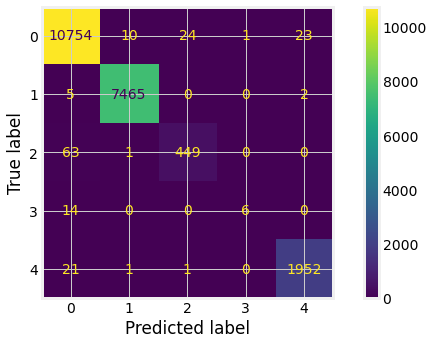

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f'Accuracy: {accuracy_score(y_test, pred)} [{name}]')
print(f'F1-score: {f1_score(y_test, pred, average="micro")} [{name}]')
print(f'Precision: {precision_score(y_test, pred, average="micro")} [{name}]')
print(f'Recall: {recall_score(y_test, pred, average="micro")} [{name}]')
print(f'Confusion Matrix: [{name}]')
conf_m = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, pred), display_labels=[0,1,2,3,4])
conf_m.plot()
plt.show()

In [338]:
pred = ensemble.predict(test_students)

submission = pd.DataFrame({'SampleID': SampleID, 'Class': pred})
print(submission)
submission.to_csv('submission6.csv', index=False)

       SampleID  Class
0             0      1
1             1      1
2             2      1
3             3      1
4             4      1
...         ...    ...
44551     44551      1
44552     44552      1
44553     44553      1
44554     44554      1
44555     44555      1

[44556 rows x 2 columns]


### Todos os modelos

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

for name, model in lista_classifiers:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, pred)} [{name}]')
    print(f'F1-score: {f1_score(y_test, pred, average="micro")} [{name}]')
    print(f'Precision: {precision_score(y_test, pred, average="micro")} [{name}]')
    print(f'Recall: {recall_score(y_test, pred, average="micro")} [{name}]')
    print(f'Confusion Matrix: [{name}]')
    conf_m = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, pred), display_labels=[0,1,2,3,4])
    conf_m.plot()
    plt.show()
    print("===========================================")